### **UK Train Rides Dataset** ###

**This project aims to analyze railway journey data from January 1st, 2024, to April 30th, 2024. The**

**dataset includes crucial information regarding railway card usage, journey status, delay reasons,**

**and other relevant details. By comprehensively examining this data, we aim to uncover significant**

**insights and patterns to improve railway operations and enhance passenger experience.**


# **Import Python Libraries** #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Read Dataset using Pandas** #

In [2]:
railway_df = pd.read_csv('railway.csv')

# **Viewing the Top Rows of a Dataset** #

**head()**
    
        is a Python function used in Pandas to display the top rows of a dataset. It helps us quickly inspect the structure of the data, including all columns and their values

In [3]:
railway_df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,12/8/2023,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,1/1/2024,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,12/16/2023,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,1/1/2024,9:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,12/19/2023,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,1/2/2024,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,12/20/2023,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,1/1/2024,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,12/27/2023,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,1/1/2024,16:45:00,19:00:00,19:00:00,On Time,NaN,No


**Inspicting the Number of Rows and Columns in a Dataset:**

**shape**

        is a Python attribute in Pandas that returns the number of rows and columns in a dataset. It helps us understand the dataset's dimensions.

In [4]:
railway_df.shape

(31653, 18)

# **Data Preparation and Cleaning** #

**1. Displaying information about the dataset**

**info()**

        is a Python function in Pandas that provides a summary of the dataset, including the number of rows and columns, data types of each column, and the count of non-null values.

In [5]:
railway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

#### **Data Standardization** ####

**In this section, we will convert all Date & Time columns to DateTime format instead of keeping them as object (string) types. This step ensures consistency and improves the accuracy of our analysis by allowing proper date-based calculations and comparisons.**

**Columns to be Converted:**

1. Date of Purchase

2. Time of Purchase

3. Date of Journey

4. Departure Time

5. Arrival Time

6. Actual Arrival Time


**Why is this important?**

- Helps in performing time

- based operations like filtering, grouping, and calculating time differences.

- Avoids errors when analyzing trends and time intervals.

- Improves performance in date-related computations.

In [6]:
railway_df['Date of Purchase'] = pd.to_datetime(railway_df['Date of Purchase'])
railway_df['Date of Journey'] = pd.to_datetime(railway_df['Date of Journey'])
railway_df['Time of Purchase'] = pd.to_datetime(railway_df['Time of Purchase'])
railway_df['Departure Time'] = pd.to_datetime(railway_df['Departure Time'])
railway_df['Arrival Time'] = pd.to_datetime(railway_df['Arrival Time'])
railway_df['Actual Arrival Time'] = pd.to_datetime(railway_df['Actual Arrival Time'])

C:\Users\sahar.hamdy\AppData\Local\Temp\ipykernel_23224\3436970451.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  railway_df['Time of Purchase'] = pd.to_datetime(railway_df['Time of Purchase'])
C:\Users\sahar.hamdy\AppData\Local\Temp\ipykernel_23224\3436970451.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  railway_df['Departure Time'] = pd.to_datetime(railway_df['Departure Time'])
C:\Users\sahar.hamdy\AppData\Local\Temp\ipykernel_23224\3436970451.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  railway_df['Arrival Time'] = pd.to_datetime(railway_df['Arrival Tim

**After Data Standardization we will :**

**- Extract only the date from columns that store full dates.**

**- Extract only the time from columns that store timestamps.**

In [7]:
railway_df['Date of Purchase'] = railway_df['Date of Purchase'].dt.date  # Extract date
railway_df['Date of Journey'] = railway_df['Date of Journey'].dt.date  
railway_df['Time of Purchase'] = railway_df['Time of Purchase'].dt.time  # Extract time
railway_df['Departure Time'] = railway_df['Departure Time'].dt.time
railway_df['Arrival Time'] = railway_df['Arrival Time'].dt.time
railway_df['Actual Arrival Time'] = railway_df['Actual Arrival Time'].dt.time

#### **Display Information of Data Again to insure from Changes** ####

In [8]:
railway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [9]:
type(railway_df['Date of Purchase'][0])

datetime.date

In [10]:
type(railway_df['Time of Purchase'][0])

datetime.time

In [11]:
type(railway_df['Date of Journey'][0])

datetime.date

#### **Steps to Handle Missing Values** ####

##### **1. Identify Missing Values** #####

In [12]:
railway_df.isna().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

**The dataset contains over 20,000 null values**

##### **2. Handling Values** #####

**- "Railway Card":** These null values will be replaced with "Unknown" to ensure completeness.

**- "Reason for Delay:"** All Null values will be replaced with "No Delay"

**- "Actual Arrival Time":** All Null values will be replaced with "unique time"


In [14]:
# Fill Nulls
railway_df['Actual Arrival Time'].fillna(' ', inplace=True)
railway_df['Railcard'].fillna('No-Railcard', inplace=True)
railway_df['Reason for Delay'].fillna("Arrived", inplace=True)

**Insure Everything is Alright**

In [15]:
railway_df.isna().sum()

Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    0
Date of Journey        0
Departure Time         0
Arrival Time           0
Actual Arrival Time    0
Journey Status         0
Reason for Delay       0
Refund Request         0
dtype: int64

In [16]:
railway_df['Reason for Delay'].value_counts()

Reason for Delay
No Delay              27481
Weather                 995
Technical Issue         707
Signal Failure          523
Signal failure          447
Staffing                410
Staff Shortage          399
Weather Conditions      377
Traffic                 314
Name: count, dtype: int64

#### **Standardizing Values in the "Reason for Delay" Column** ###

**To maintain consistency in our dataset, we need to unify similar values under a single standardized term. This will prevent issues in analysis, such as incorrect groupings or duplicate categories.**

**Corrections to be Made:**

- "Weather & Weather Conditions" → "Weather"

- "Signal Failure & Signal failure" → "Signal Failure" (Ensure consistent capitalization)

- "Staffing & Staff Shortage" → "Staff Shortage"

In [17]:
# unify the reasons for delay
railway_df['Reason for Delay'] = railway_df['Reason for Delay'].replace({'Weather & Weather Conditions': 'Weather',
    'Signal failure': 'Signal Failure',
    'Staffing': 'Staff Shortage'})

In [18]:
railway_df['Reason for Delay'].value_counts()

Reason for Delay
No Delay              27481
Weather                 995
Signal Failure          970
Staff Shortage          809
Technical Issue         707
Weather Conditions      377
Traffic                 314
Name: count, dtype: int64

### **Display the Statistical Information of our Dataset**

In [19]:
railway_df.describe()

,Price
count,31653.000000
mean,23.439200
std,29.997628
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


In [20]:
railway_df['Journey Status'].value_counts()

Journey Status
On Time      27481
Delayed       2292
Cancelled     1880
Name: count, dtype: int64

### **Save the Changes we applied for Dataset for the next Stage** 

In [21]:
railway_df.to_csv('railway_cleaned.csv', index=False)

# **Data Explotration**

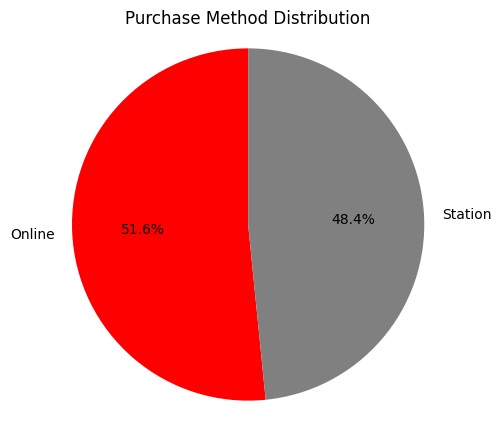

In [39]:
purchase_method_totals = railway_df.groupby('Purchase Type')['Price'].sum().reset_index()

# Rename columns for clarity
purchase_method_totals.columns = ['Purchase Type', 'Total_Price']

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    purchase_method_totals['Total_Price'], 
    labels=purchase_method_totals['Purchase Type'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['red', 'gray']
)
plt.title('Purchase Method Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

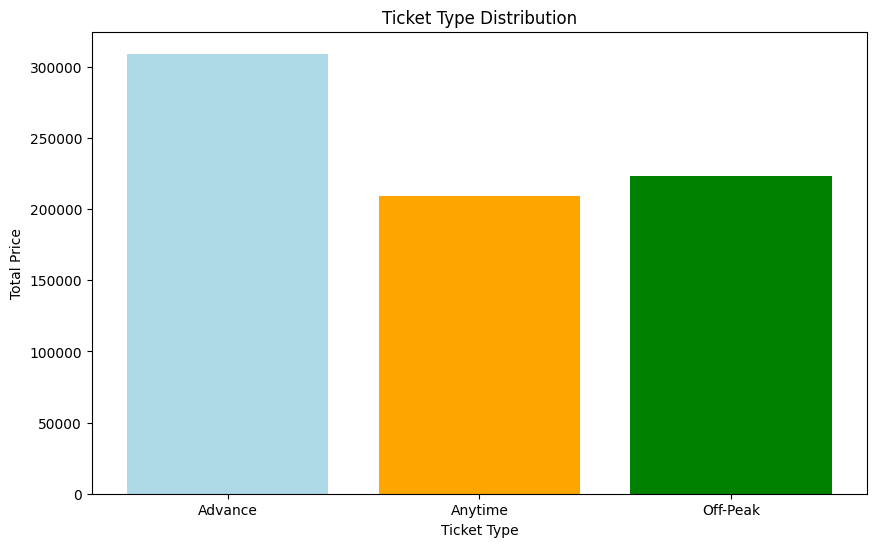

In [37]:
# Group by Ticket Type and calculate the total price for each type
ticket_type_totals = railway_df.groupby('Ticket Type')['Price'].sum().reset_index()

# Rename columns for clarity
ticket_type_totals.columns = ['Ticket Type', 'Total_Price']

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(ticket_type_totals['Ticket Type'], ticket_type_totals['Total_Price'], color=['lightblue', 'Orange', 'Green'])
plt.title('Ticket Type Distribution')
plt.xlabel('Ticket Type')  # Label for the x-axis
plt.ylabel('Total Price')  # Label for the y-axis
plt.show()